
**This is what you'll need to submit on Canvas:**

1. This notebook, completed.
2. Your cleaned data in csv form (as noted in the Data Cleaning section below).
3. Whatever code you have written for your project. If you have multiple notebooks going, submit them all. 

*Please make all plots inline. They need to appear in this notebook*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Police-Shootings.csv")

Cleans the data by removing id column and changing all unknown in armed column to undetermined

## Data cleaning

The first step to data analysis is ensuring that you are focussing on the subset of the data that you have complete information about.

Having taken a look at your dataset, what columns and rows have you decided to drop from it? Why?

*A valid reason for dropping a column could be lack of information about the column, lack of a clear understanding of the units of measurement, a general feeling that it does not contain any useful information etc*

If you decided to focus on just a subset of your data please describe why you chose that subset and why you feel the other rows do not matter.

Save your cleaned data into a csv (Use the _`dataframe`_`.to_csv("filename.csv")` method). **Submit the cleaned csv on Canvas**. 

Please name your file **data_your name_partner's name_cleaned.csv**. To be clear, if it was Ada and Antonio's project, they would submit `data_ada_antonio_cleaned.csv`

In [4]:
del data["id"]

In [46]:
data["armed"] = data["armed"].replace("unknown", "undetermined")
data["threat_level"] = data["threat_level"].replace("undetermined", "other")

In [47]:
data

,name,date,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,manner_of_death,body_camera,year
0,Tim Elliot,2015-01-02,gun,53,Male,Asian,Shelton,WA,True,attack,Not fleeing,shot,False,2015
1,Lewis Lee Lembke,2015-01-02,gun,47,Male,White,Aloha,OR,False,attack,Not fleeing,shot,False,2015
2,John Paul Quintero,2015-01-03,unarmed,23,Male,Hispanic,Wichita,KS,False,other,Not fleeing,shot and Tasered,False,2015
3,Matthew Hoffman,2015-01-04,toy weapon,32,Male,White,San Francisco,CA,True,attack,Not fleeing,shot,False,2015
4,Michael Rodriguez,2015-01-04,nail gun,39,Male,Hispanic,Evans,CO,False,attack,Not fleeing,shot,False,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,Chase Roundtree,2020-07-16,gun,33,Male,White,Knox County,TX,False,attack,Not fleeing,shot,False,2020
5476,David Martin,2020-07-17,gun,28,Male,unknown,Fruita,CO,False,other,unknown,shot,False,2020
5477,Malcolm Comeaux,2020-07-17,toy weapon,24,Male,unknown,Houston,TX,False,other,Not fleeing,shot,False,2020
5478,Darius Washington,2020-07-18,gun,24,Male,Black,Chicago Heights,IL,False,attack,Foot,shot,False,2020


In [48]:
data.to_csv("data_christian_jason_kevin.csv")

## Visualizations 

Make at least 5 visualizations that reveal something interesting about the data.

Make sure that your visualizations
1. Have things like the axes, titles, units etc
2. Are telling a slightly interesting story. Interesting = something a person who has not seen this data might not be able to just guess.

Write a few lines telling us what your visualization represents and what it reveals.

In [7]:
def get_year(x):
    lst = x.split('-')
    if len(lst) > 1:
        return lst[0]

In [8]:
data['year'] = data['date'].apply(get_year)

Sees how many shootings happen in each state

In [9]:
state_count = data.groupby("state", as_index = False).agg({"city" : "count"})

In [10]:
state_count.columns = ["state", "shootings"]

group further into regions so pie chart is less clustered

In [11]:
state_regions = pd.read_csv("state_regions.csv")

In [12]:
merged = state_count.merge(state_regions, on = "state")

In [13]:
region_counts = merged.groupby("region", as_index = False).agg({"shootings" : "mean"})

In [15]:
region_counts

,region,shootings
0,MIDWEST,72.416667
1,NORTHEAST,42.888889
2,SOUTH,135.058824
3,WEST,148.384615


Text(0.5, 1.0, 'Average Shootings per State in the Four Major Regions')

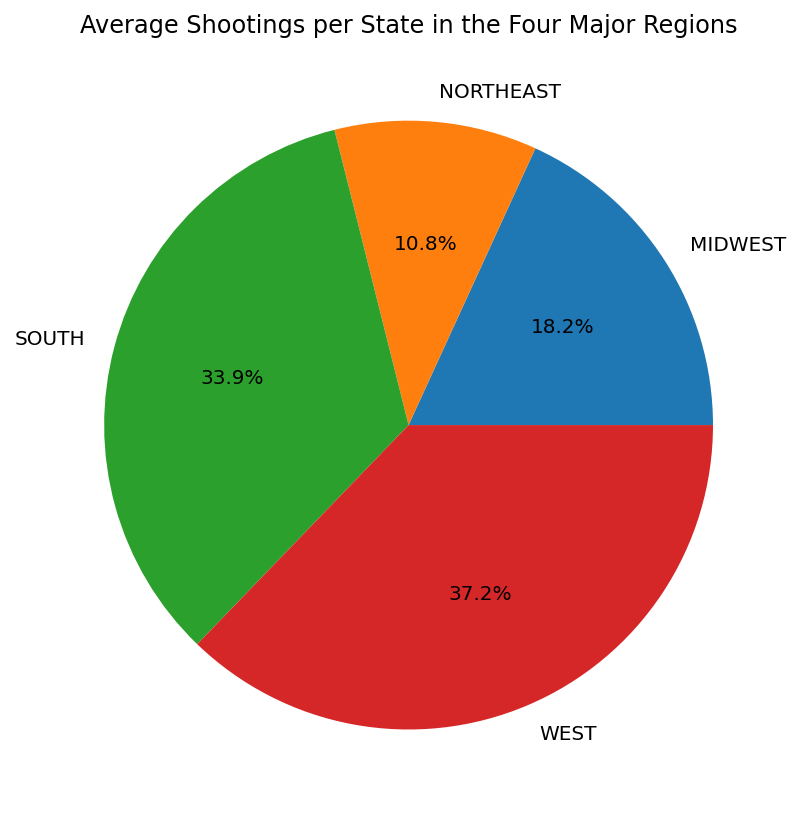

In [16]:
_ = plt.pie(region_counts["shootings"], labels = region_counts["region"], autopct = "%1.1f%%")

plt.title("Average Shootings per State in the Four Major Regions")

This chart shows that the west and the south have a significantly higher average shootings per each state in the region.
There could be many possible reasons for this result, not all states are equal and certain outlier states in each region could greatly influence the average. The general trend is clear, even if the reason for it isn't.

In [14]:
state_count.loc[state_count["shootings"] < 150, "state"] = "Other"

In [15]:
state_count = state_count.groupby("state", as_index = False).agg({"shootings" : "sum"})

Text(0.5, 1.0, 'Shootings per State (Other < 150 Shootings)')

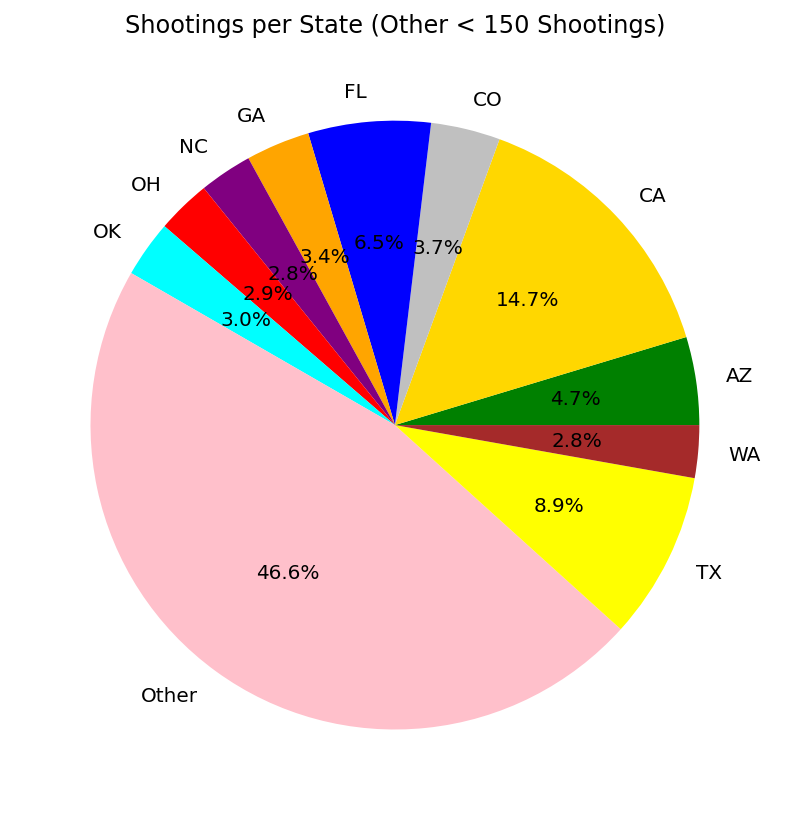

In [16]:
my_colors = ["green", "gold", "silver", "blue", "orange", "purple", "red", "cyan", "pink", "yellow", "brown"]

__ = plt.pie(state_count["shootings"], labels = state_count["state"], autopct = "%1.1f%%", colors = my_colors)

plt.title("Shootings per State (Other < 150 Shootings)")

This shows the shootings per state, with the Other section consisting of all the states with under 150 shootings. California, Texas, and then Florida have the highest number of shootings, which could be linked with their higher population. It also explains the trend of higher number of shootings in the west and south, the top 3 states are all in these two regions.

In [29]:
np.unique(data['threat_level'])

array(['attack', 'other', 'undetermined'], dtype=object)

_ = plt.pie(skysc_for_pie["statistics.height"], labels = skysc_for_pie["location.city"])

This is a visulatization of the amount of people who were killed by police the last 5 years. This data shows that most of those people were white followed by black then hispanic

In [17]:
race_data = data.groupby("race", as_index = False).agg({"name" : "count"})

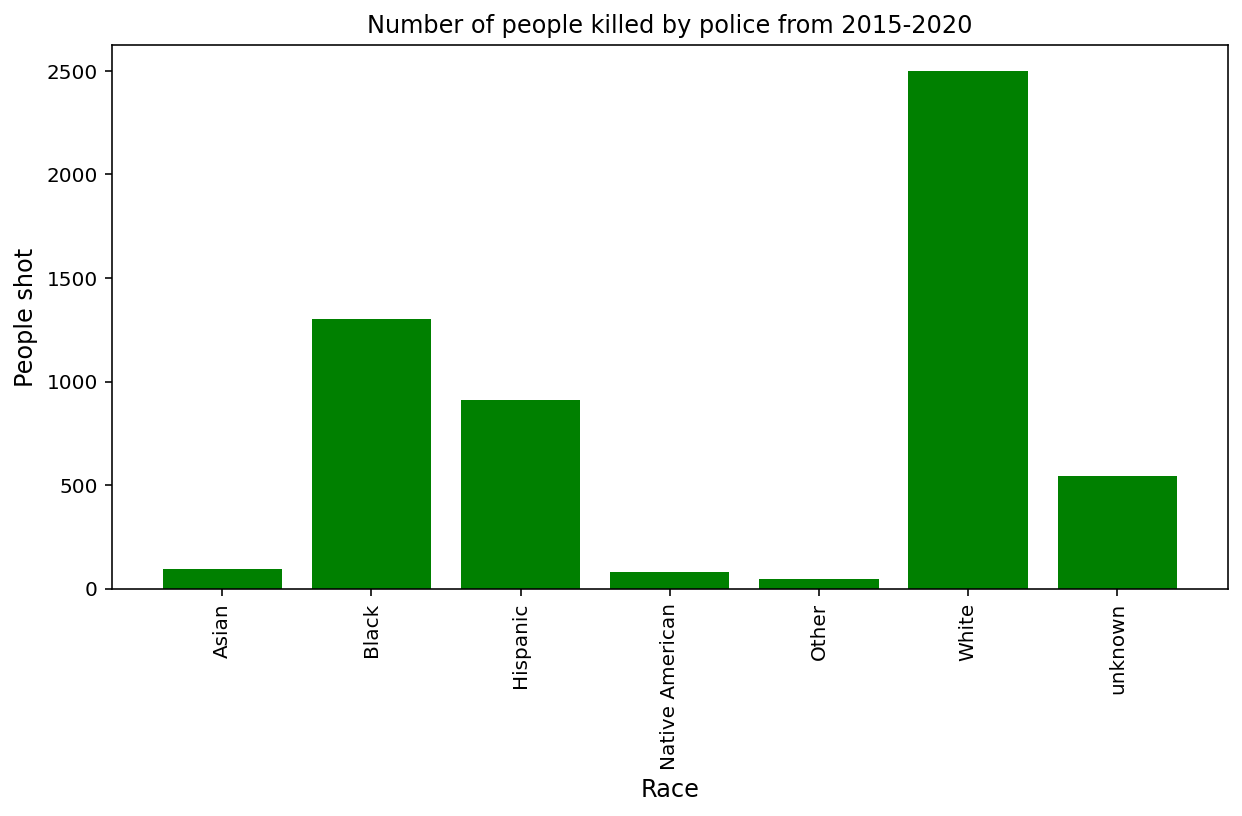

In [18]:
plt.figure(figsize = (10,5))
plt.title("Number of people killed by police from 2015-2020")
plt.xlabel("Race", size = "large")
plt.ylabel("People shot", size = "large")
plt.bar(x = np.arange(0,7), height = race_data["name"], color = "green")
_ = plt.xticks(ticks = np.arange(0,7), labels = race_data["race"], rotation = 90)

In [19]:
unarmed_individuals = data[data ["armed"] == "unarmed"]

In [20]:
race_data_unarmed = unarmed_individuals.groupby("race", as_index = False).agg({"name" : "count"})

This data shows the amount of unarmed people that were shot by police in the last 5 years. White people are still leading, however the gap has been significantly closed and black people are a close second.

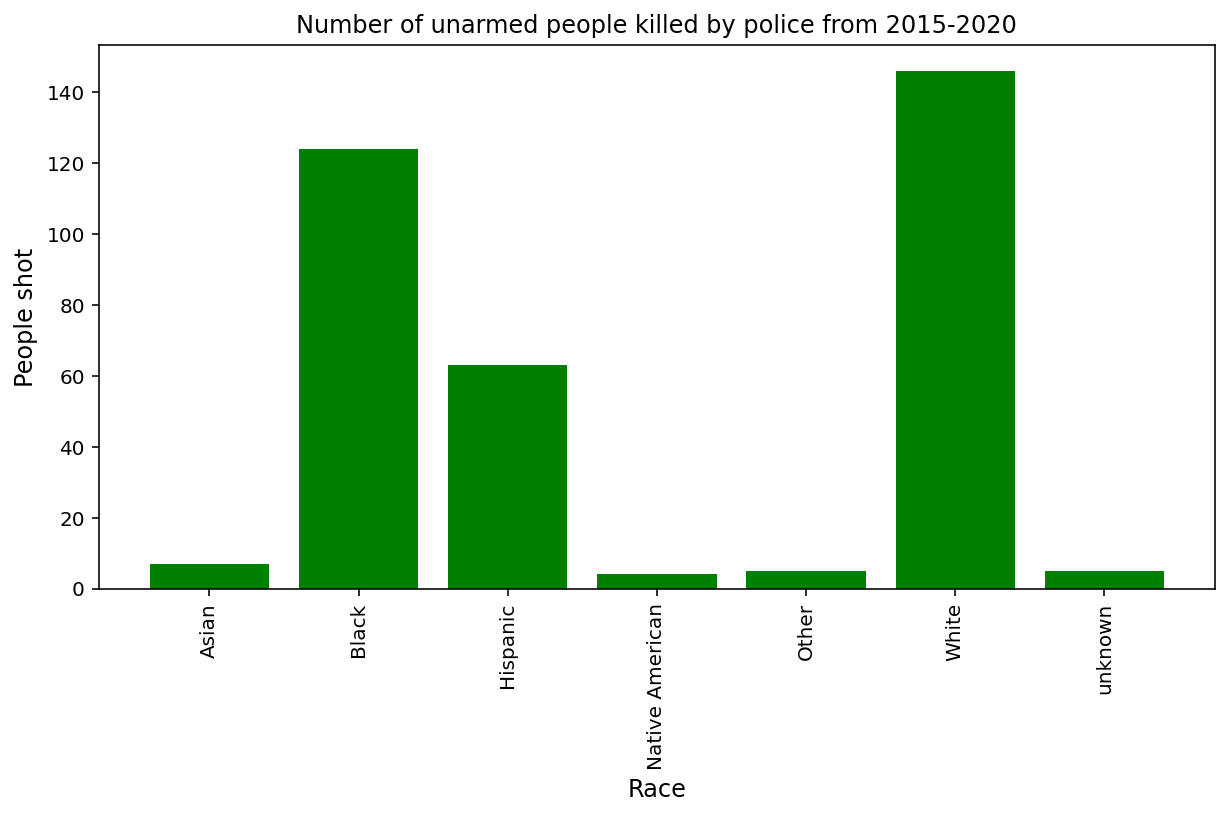

In [21]:
plt.figure(figsize = (10,5))
plt.title("Number of unarmed people killed by police from 2015-2020")
plt.xlabel("Race", size = "large")
plt.ylabel("People shot", size = "large")
plt.bar(x = np.arange(0,7), height = race_data_unarmed["name"], color = "green")
_ = plt.xticks(ticks = np.arange(0,7), labels = race_data_unarmed["race"], rotation = 90)

*Answer in this markdown cell. Add more markdown cells if you want.*

In [23]:
data_gender_pie = data.groupby('gender', as_index = False).agg({'name' : 'count'})
data_gender_pie.columns = ['gender', 'count']
data_gender_pie

,gender,count
0,Female,243
1,Male,5236
2,Unknown,1


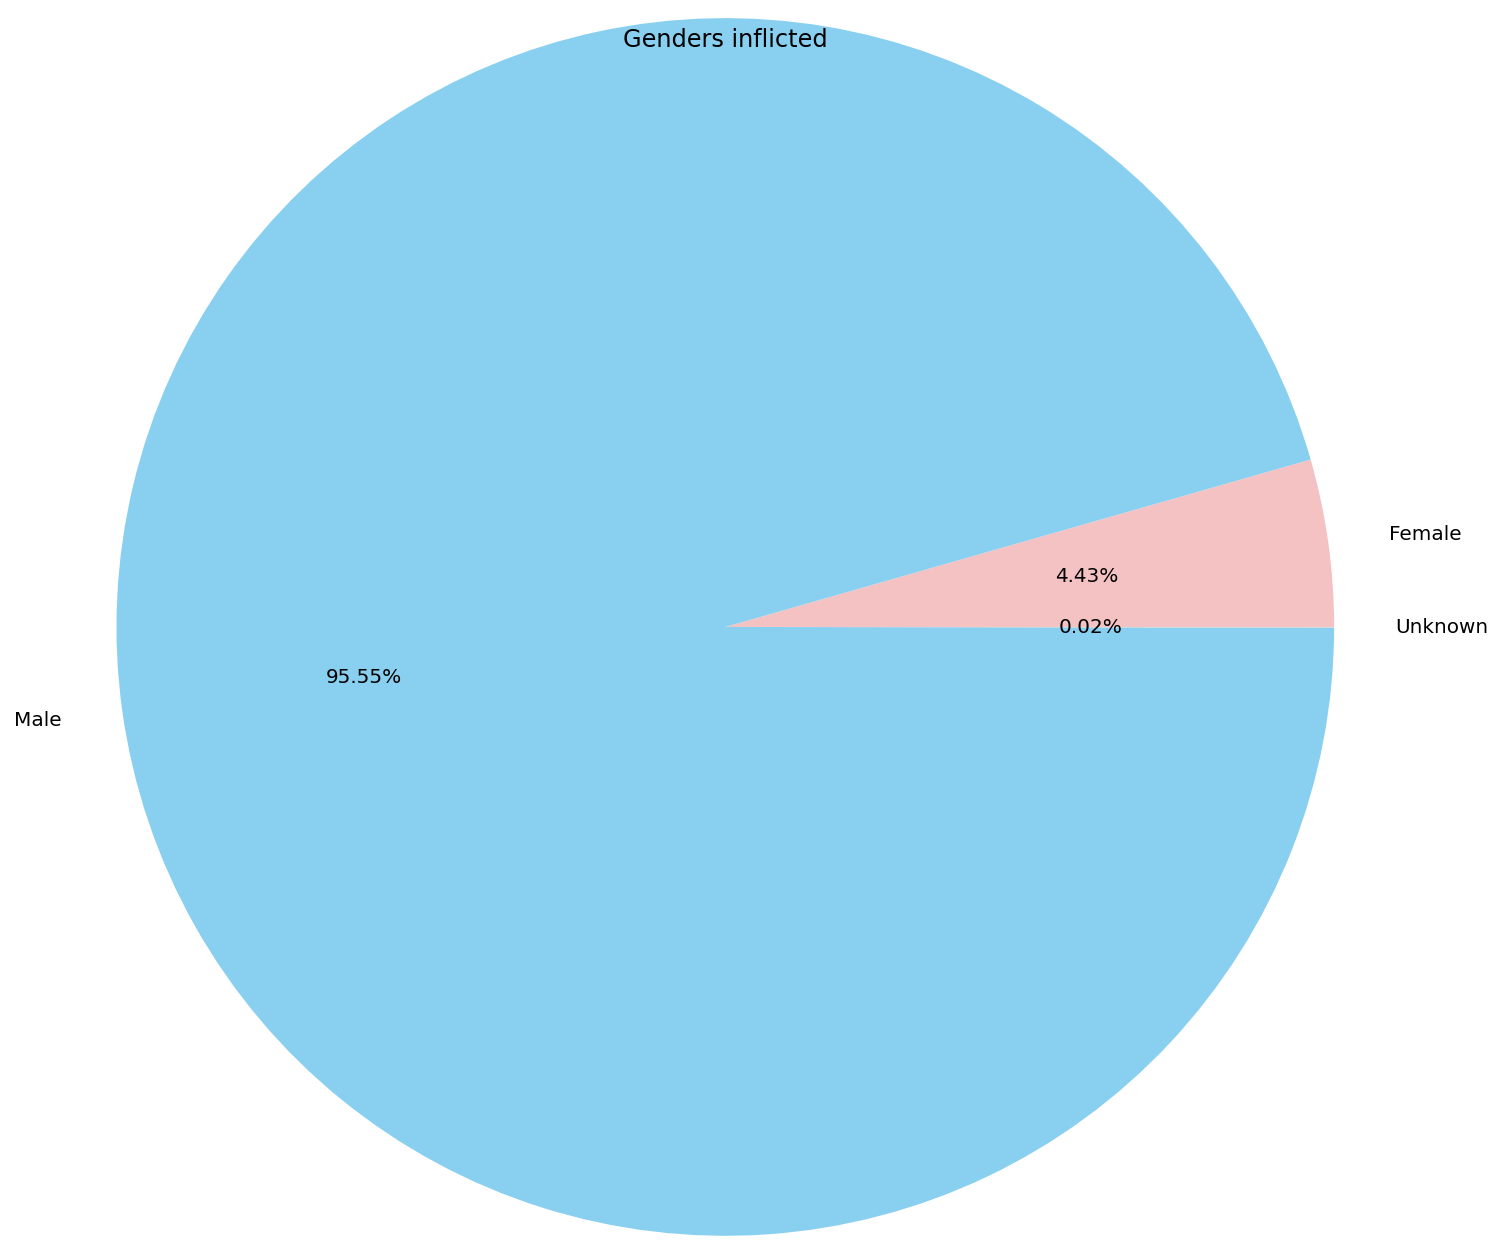

In [44]:
_ = plt.pie(data_gender_pie['count'], labels = data_gender_pie['gender'], colors = ['#f4c2c2', '#89cff0', '#D3D3D3'], autopct = '%1.2f%%', radius = 2)

yeet = plt.title('Genders inflicted', pad = 100)



This pie chart shows that males are more likely to the victim to a police shooting than females.

In [42]:
Male_attack = len(data[(data['gender'] == 'Male') & (data['threat_level'] == 'attack')])
Female_attack = len(data[(data['gender'] == 'Female') & (data['threat_level'] == 'attack')])

Male_other = len(data[(data['gender'] == 'Male') & (data['threat_level'] == 'other')])
Female_other = len(data[(data['gender'] == 'Female') & (data['threat_level'] == 'other')])

data_threat_men = pd.DataFrame({'type':['Attacking Men', 'Other Men'], 'amount':[Male_attack, Male_other]})
data_threat_women = pd.DataFrame({'type':['Attacking Women', 'Other Women'], 'amount':[Female_attack, Female_other]})

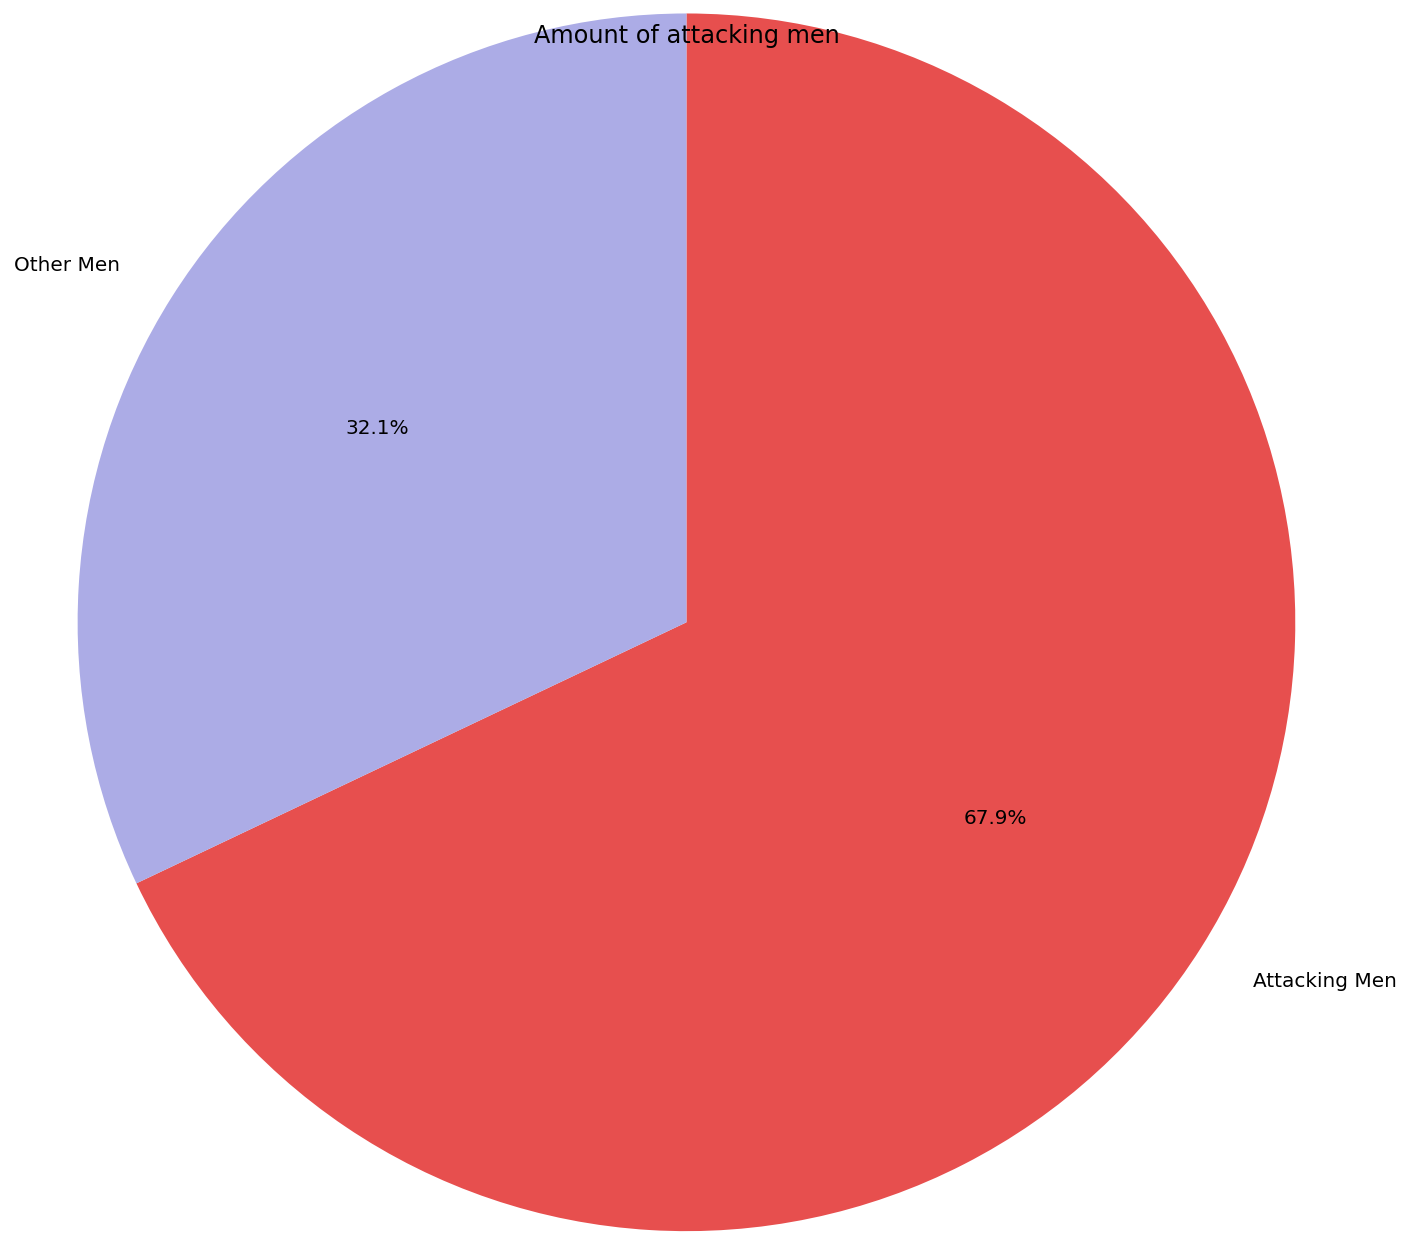

In [50]:
_ = plt.pie(data_threat_men['amount'], labels = data_threat_men['type'], colors = ['#e74f4e', '#acace6'], autopct = '%1.1f%%', 
            radius = 2, startangle = 90, counterclock = False)

yeet = plt.title('Amount of attacking men', pad = 100)

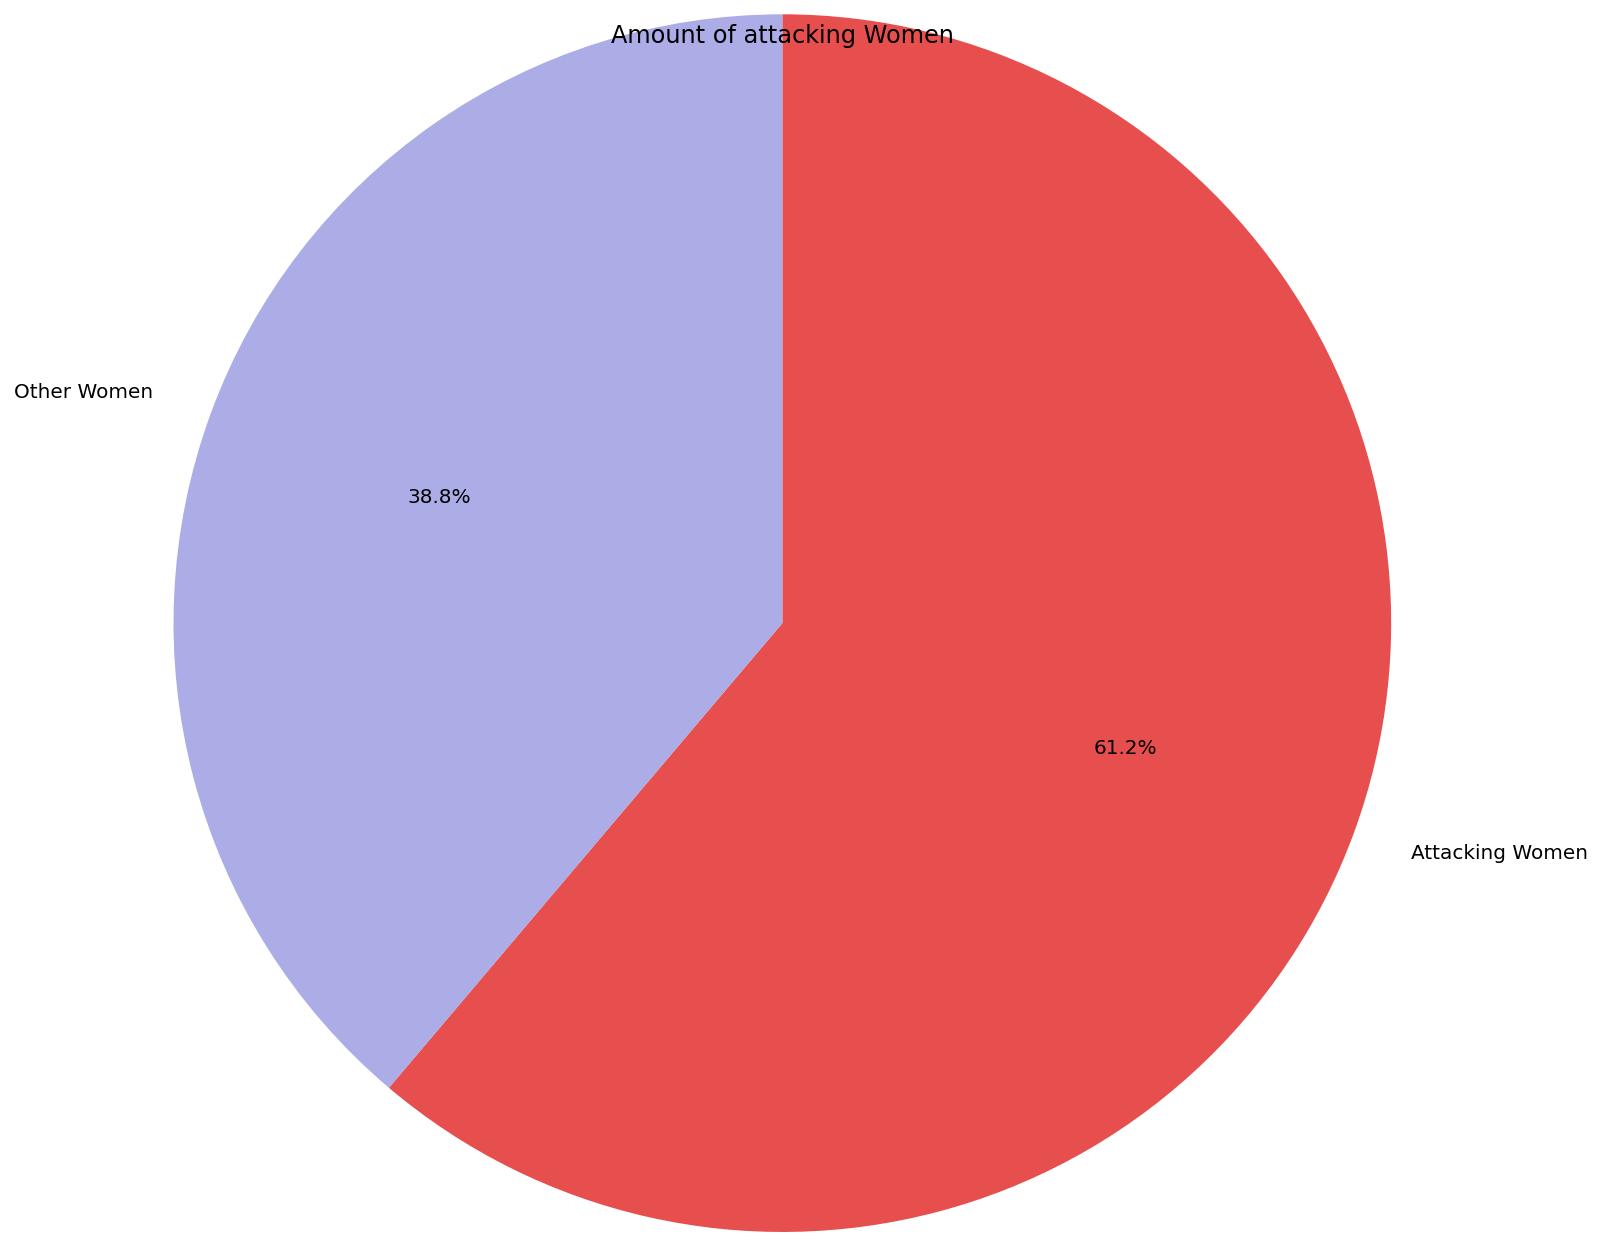

In [49]:
_ = plt.pie(data_threat_women['amount'], labels = data_threat_women['type'], colors = ['#e74f4e', '#acace6'], autopct = '%1.1f%%', 
            radius = 2, startangle = 90, counterclock = False)

yeet = plt.title('Amount of attacking Women', pad = 100)

The percent of Attacking men and women were relatively similiar. So it may be that men may SEEM to be more threating or Men are just more likely to be in places where these things take place.

In [32]:
BodyCamerasData = data.groupby('body_camera', as_index = False).agg({'name' : 'count'})
BodyCamerasData.columns = ['body_camera', 'count']
BodyCamerasData

,body_camera,count
0,False,4842
1,True,638


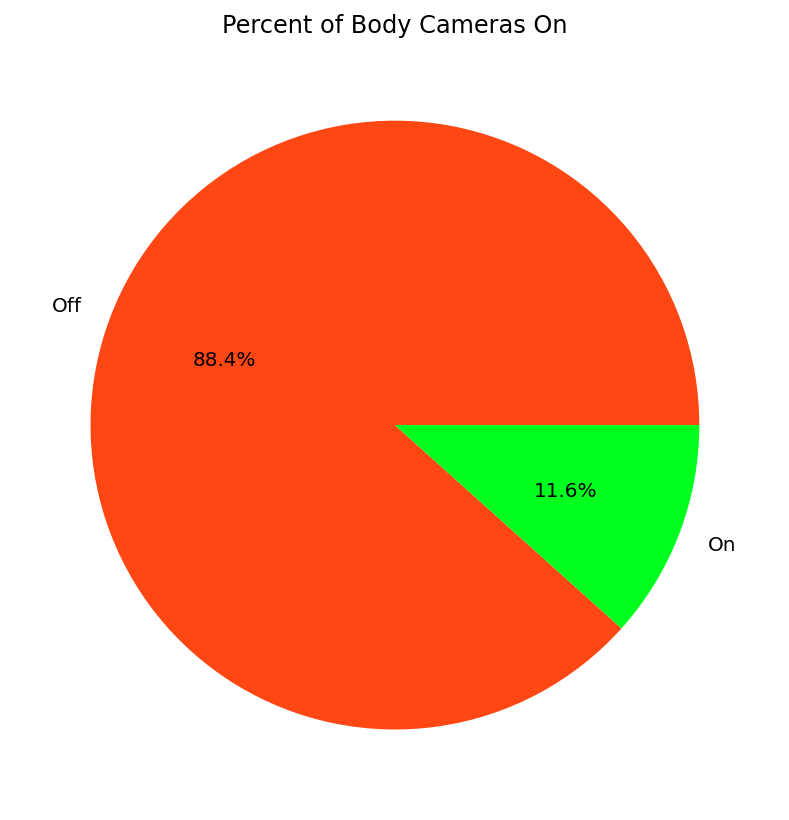

In [33]:
_ = plt.pie(BodyCamerasData['count'], labels = ['Off', 'On'], colors = ['#ff4714','#00ff1e'], autopct = '%1.1f%%')

yeet = plt.title('Percent of Body Cameras On')


There are so many more body cameras turned off during police shootings. Almost 90% of the body cameras are off during the shooting.

In [2]:
data_year_bar = data.groupby('year',as_index = False).agg({'name' : 'count'})
data_year_bar.columns = ['year', 'count']
data_year_bar = data_year_bar.drop(5)

NameError: name 'data' is not defined

In [1]:
plt.figure(figsize = (10,5))
plt.bar(data_year_bar['year'], data_year_bar['count'], width = 0.5, color = '#59EE9A')

plt.title('Shootings every Year')
plt.xlabel('Year', size = 'large')
_ = plt.ylabel('Number of Shootings', size = 'large')

NameError: name 'plt' is not defined

There is almost 1000 shootings every year, and at the rate